## Capstone Project - E-commerce firm

In the E-comm firm, an CEO wants to visualized the trend of orders, sales and other parameters through which he can conclude
the important aspects.

### Importing Libraries

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


### Reading the Datasets

In [83]:
df_customers = pd.read_csv('customers.csv')
df_order_items = pd.read_csv('order_items.csv')
df_orders = pd.read_csv('orders.csv')
df_payments = pd.read_csv('payments.csv')
df_products = pd.read_csv('products.csv')
df_sellers = pd.read_csv('sellers.csv')
df_user_feedback = pd.read_csv('user_feedback.csv')



### Merging the Datasets

In [84]:
df_all = df_orders.merge(df_orders, on='order_id', how='left')

df_all = df_all.merge(df_order_items, on='order_id', how='outer', validate='m:m')

df_all = df_all.merge(df_products, on='product_id', how='outer')

df_all = df_all.merge(df_sellers, on='seller_id', how='outer')

print(df_all.shape)

(113529, 25)


In [85]:
df_customers.head(3)

,customer_id,customer_unique_id,customer_state
0,06b8999e2f,861eff4711,SP
1,18955e83d3,290c77bc52,SP
2,4e7b3e0028,060e732b5b,SP


### Analysis on the Customers data

In [86]:
# Finding the rows & Columns

df_customers.shape

(99441, 3)

In [87]:
#Checking null values

df_customers.isnull().sum()

customer_id           0
customer_unique_id    0
customer_state        0
dtype: int64

In [88]:
# identifying unique records

state = df_customers["customer_state"].nunique()
state

27

#### There are total 27 states are present

In [89]:
# Grouping the state with customer_id

c = df_customers.groupby('customer_state')['customer_id'].nunique().sort_values(ascending=False)
c

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

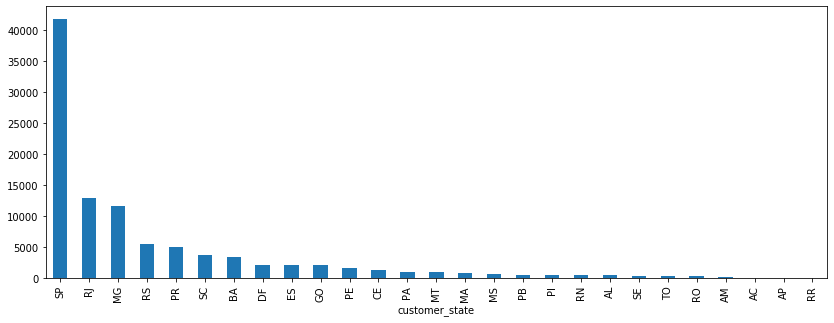

In [90]:
# Plotting

plt.figure(figsize=(14,5))
c.plot(kind="bar")
plt.show()

#### Maximum numbers of the customers are from <u>SP</u> State

### <u>Orders Analysis </u>

In [91]:
df_orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_to_carrier_date,order_delivered_to_customer_date,order_estimated_delivery_date
0,e481f51cbd,9ef432eb62,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8b,b0830fb474,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb910,41ce2a54c0,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44db,f88197465e,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c08,8ab97904e6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [92]:
# Finding the rows & Columns

df_orders.shape

(99441, 8)

#### Total no.of orders are 99441

In [93]:
# Checking the status of an orders

df_order_status = df_orders.groupby('order_status')['order_id'].nunique().sort_values(ascending = False)
df_order_status



order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

#### Mostly orders are deliverd to the customers.

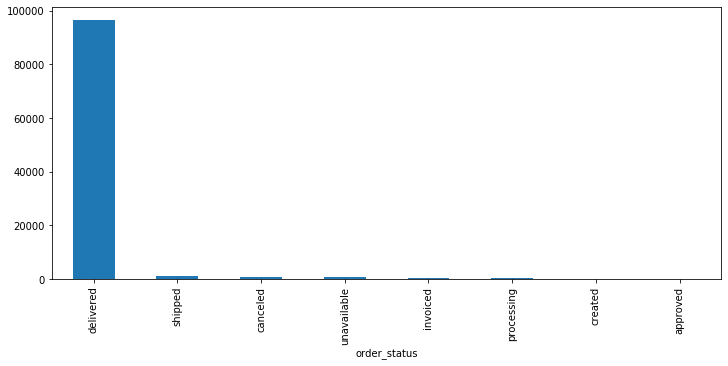

In [94]:
# Ploting the orderstatus graph

plt.figure(figsize=(12,5))
df_order_status.plot(kind="bar")
plt.show()

#### Mostly orders are deliverd to the customers.

In [95]:
df_orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_to_carrier_date,order_delivered_to_customer_date,order_estimated_delivery_date
0,e481f51cbd,9ef432eb62,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8b,b0830fb474,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb910,41ce2a54c0,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [96]:
 #Changing the data type for date columns
    
timestamp_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_to_carrier_date', 
                  'order_estimated_delivery_date']
for col in timestamp_cols:
    df_orders[col] = pd.to_datetime(df_orders[col])
    
# Extracting attributes for purchase date - Year and Month

df_orders['order_purchase_year'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.year)
df_orders['order_purchase_month'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.month)
df_orders['order_purchase_month_name'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%b'))
df_orders['order_purchase_year_month'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m'))
df_orders['order_purchase_date'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m%d'))



In [97]:
# Extracting attributes for purchase date - Day and Day of Week

df_orders['order_purchase_day'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.day)
df_orders['order_purchase_dayofweek'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.dayofweek)
df_orders['order_purchase_dayofweek_name'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%a'))



In [98]:
# Extracting attributes for purchase date - Hour and Time of the Day

df_orders['order_purchase_hour'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.hour)
hours_bins = [-0.1, 6, 12, 18, 23]
hours_labels = ['Dawn', 'Morning', 'Afternoon', 'Night']
df_orders['order_purchase_time_day'] = pd.cut(df_orders['order_purchase_hour'], hours_bins, labels=hours_labels)



In [99]:
# New DataFrame after transformations

df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_to_carrier_date,order_delivered_to_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day
0,e481f51cbd,9ef432eb62,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,Oct,201710,20171002,2,0,Mon,10,Morning
1,53cdb2fc8b,b0830fb474,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,7,Jul,201807,20180724,24,1,Tue,20,Night
2,47770eb910,41ce2a54c0,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018,8,Aug,201808,20180808,8,2,Wed,8,Morning
3,949d5b44db,f88197465e,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017,11,Nov,201711,20171118,18,5,Sat,19,Night
4,ad21c59c08,8ab97904e6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018,2,Feb,201802,20180213,13,1,Tue,21,Night


#### Now we can analysed the data as per the year, month, week, day etc..

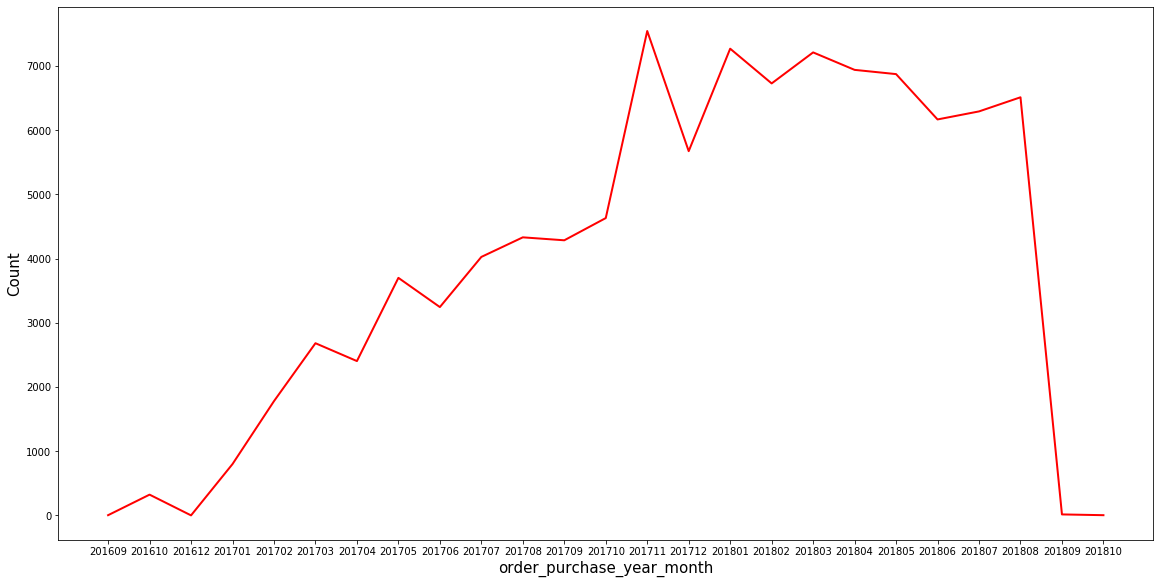

In [100]:
# Lineplot - Evolution of e-commerce orders along time 

fig = plt.figure(constrained_layout=True, figsize=(16, 8))
ao = sns.lineplot(data=df_orders['order_purchase_year_month'].value_counts().sort_index(), linewidth=2, color = 'red')
ao.set_xlabel('order_purchase_year_month',fontsize=15)
ao.set_ylabel('Count',fontsize=15)
plt.show()

#### Maximum orders rate are in November 2017 

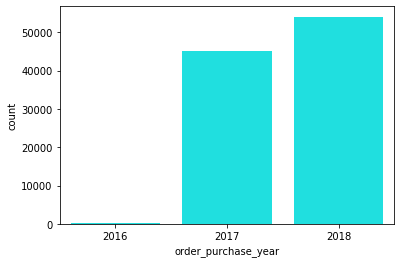

In [133]:
a2 = sns.countplot(x="order_purchase_year", data=df_orders, color = 'cyan')


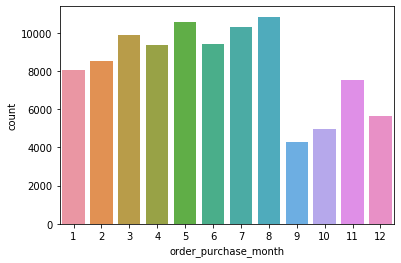

In [102]:
a3 = sns.countplot(x="order_purchase_month", data=df_orders)

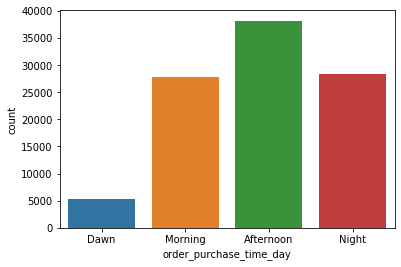

In [131]:
a4 = sns.countplot(x="order_purchase_time_day", data=df_orders)


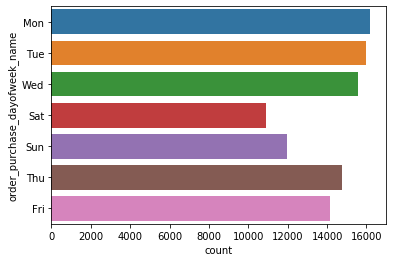

In [134]:
a5 = sns.countplot(y="order_purchase_dayofweek_name", data=df_orders )

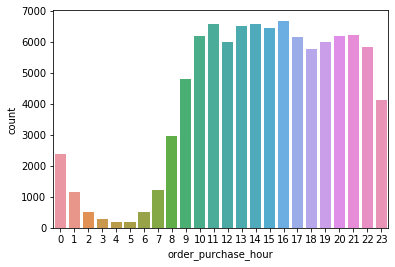

In [105]:
a6 = sns.countplot(x="order_purchase_hour", data=df_orders )

### Order-items

In [106]:
df_order_items.head(3)

,order_id,product_id,seller_id,price
0,00010242fe,4244733e06,48436dade1,58
1,00018f77f2,e5f2d52b80,dd7ddc04e1,239
2,000229ec39,c777355d18,5b51032edd,199


In [107]:
# Checking the null values

df_order_items.isnull().sum()

order_id      0
product_id    0
seller_id     0
price         0
dtype: int64

In [108]:
print("Maximum price of the product is :", max(df_order_items.price))

Maximum price of the product is : 6735


### Payment-Analysis

In [109]:
df_payments.head(3)

,order_id,payment_type,payment_value
0,b81ef226f3,credit_card,99
1,a9810da829,credit_card,24
2,25e8ea4e93,credit_card,65


In [110]:
df_payments.isnull().sum()

order_id         0
payment_type     0
payment_value    0
dtype: int64

In [111]:
order_pay=pd.merge(df_orders,df_payments,how="left",on=['order_id','order_id'])

In [112]:
order_pay.shape

(103887, 20)

In [113]:
order_pay.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_to_carrier_date,order_delivered_to_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day,payment_type,payment_value
0,e481f51cbd,9ef432eb62,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,Oct,201710,20171002,2,0,Mon,10,Morning,credit_card,18.0
1,e481f51cbd,9ef432eb62,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,Oct,201710,20171002,2,0,Mon,10,Morning,voucher,2.0
2,e481f51cbd,9ef432eb62,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,Oct,201710,20171002,2,0,Mon,10,Morning,voucher,18.0


In [114]:
pay_type=df_payments.groupby('payment_type').aggregate({'order_id':'count'}).rename(columns={'order_id':'count'}).sort_values(by='count',ascending=False).reset_index()

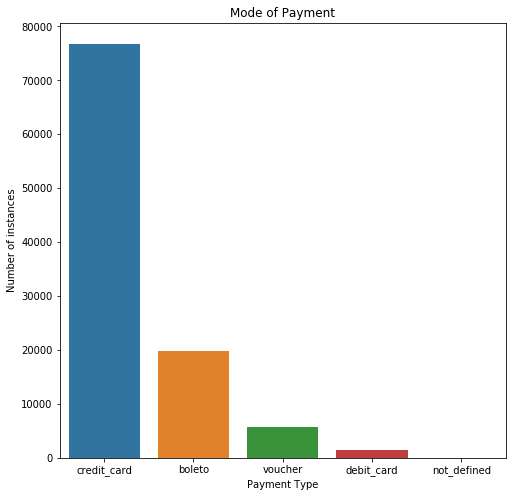

In [115]:
plt.figure(figsize=(8,8))
a=sns.barplot(x='payment_type',y='count',data=pay_type)
plt.title("Mode of Payment")
plt.xlabel('Payment Type')
plt.ylabel('Number of instances')
plt.show()

#### A large number of buyers use credit card their prefered mode of payment

### Product Analysis

In [116]:
df_products.head(3)

,product_id,product_photos_count,product_length_cm,product_height_cm,product_width_cm,product_category_name,product_weight_kg
0,1e9e8ef04d,1.0,16.0,10.0,14.0,perfumery,0.225
1,3aa071139c,1.0,30.0,18.0,20.0,art,1.000
2,96bd76ec88,1.0,18.0,9.0,15.0,sports_leisure,0.154


In [117]:
df_products.isnull().sum().sort_values(ascending = False)

product_photos_count     610
product_weight_kg          2
product_width_cm           2
product_height_cm          2
product_length_cm          2
product_category_name      0
product_id                 0
dtype: int64

In [118]:
print(df_products['product_category_name'].unique())

['perfumery' 'art' 'sports_leisure' 'baby' 'housewares'
 'musical_instruments' 'cool_stuff' 'furniture_decor' 'home_appliances'
 'toys' 'bed_bath_table' 'construction_tools_safety'
 'computers_accessories' 'health_beauty' 'luggage_accessories'
 'garden_tools' 'office_furniture' 'auto' 'electronics' 'fashion_shoes'
 'telephony' 'stationery' 'fashion_bags_accessories' 'computers'
 'home_construction' 'watches_gifts' 'construction_tools_construction'
 'pet_shop' 'small_appliances' 'agro_industry_and_commerce' 'other'
 'furniture_living_room' 'signaling_and_security' 'air_conditioning'
 'consoles_games' 'books_general_interest' 'costruction_tools_tools'
 'fashion_underwear_beach' 'fashion_male_clothing'
 'kitchen_dining_laundry_garden_furniture'
 'industry_commerce_and_business' 'fixed_telephony'
 'construction_tools_lights' 'books_technical' 'home_appliances_2'
 'party_supplies' 'drinks' 'market_place' 'la_cuisine'
 'costruction_tools_garden' 'fashio_female_clothing' 'home_confort'
 'audi

In [119]:
print("The total nos of products are :", df_products['product_category_name'].count())

The total nos of products are : 32951


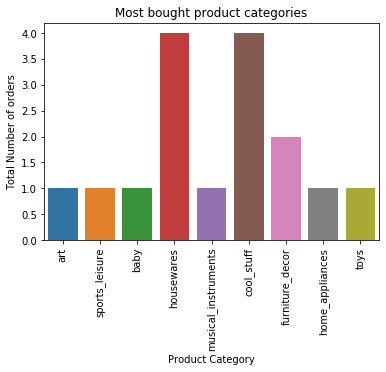

In [120]:
### Visualising top 10 most bought product categories:

sns.barplot(x='product_category_name',y='product_photos_count',data=df_products[1:10])
plt.xlabel("Product Category")
plt.ylabel("Total Number of orders")
plt.title("Most bought product categories")
plt.xticks(rotation='vertical')
plt.show()

#### The most selling products are housewares & cool_stuf

### Seller Analysis

In [121]:
df_sellers.head(3)

,seller_id,seller_state
0,3442f8959a,SP
1,d1b65fc7de,SP
2,ce3ad9de96,RJ


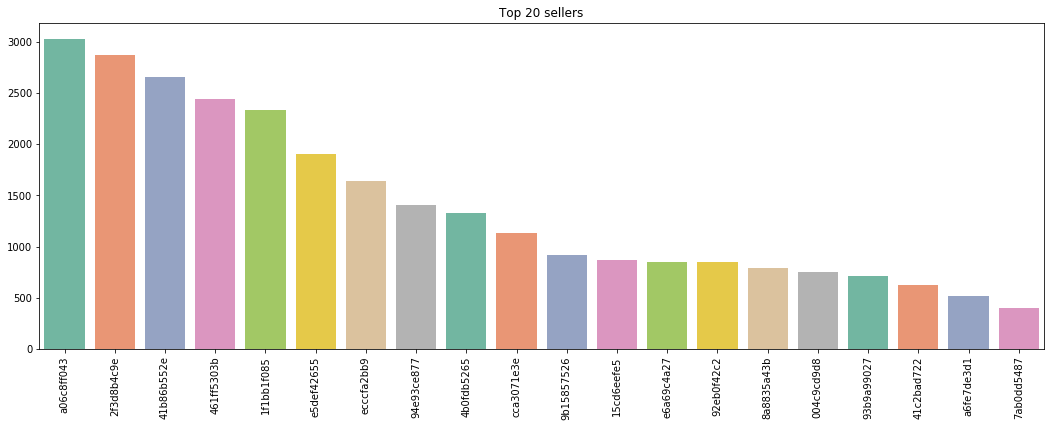

In [122]:
plt.figure(figsize=(18,6))
seller=sns.barplot(df_sellers['seller_id'].value_counts()[:20].index,df_products['product_category_name'].value_counts()[:20].values,palette='Set2')
seller.set_title('Top 20 sellers')
seller.set_xticklabels(seller.get_xticklabels(),rotation=90)
plt.show()

In [136]:
df_sellers['seller_id'].value_counts()[:20]

a06c8ff043    1
2f3d8b4c9e    1
41b86b552e    1
461ff5303b    1
1f1bb1f085    1
e5def42655    1
ecccfa2bb9    1
94e93ce877    1
4b0fdb5265    1
cca3071e3e    1
9b15857526    1
15cd6eefe5    1
e6a69c4a27    1
92eb0f42c2    1
8a8835a43b    1
004c9cd9d8    1
93b9a99027    1
41c2bad722    1
a6fe7de3d1    1
7ab0dd5487    1
Name: seller_id, dtype: int64

#### This are the Top 20 sellers of the products

In [123]:
df_user_feedback.head(3)

,review_id,order_id,review_score,survey_sent_date,survey_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af871,4,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c,5,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b2,5,2018-02-17 00:00:00,2018-02-18 14:36:24


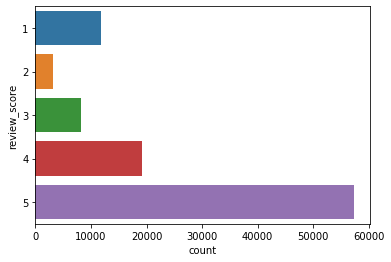

In [125]:
a7 = sns.countplot(y="review_score", data=df_user_feedback )

#### Summary OR Conclusion

1. There are total 27 states are present in which the services are available & SP state has a large volume of Customers.
2. Total no.of orders done are 99441
3. Mostly orders are deliverd to the customers.
4. Based on timestamp we have distinguish data as per the year, month, week, day etc.
5. Maximum orders rate are in November 2017 
6. Trend of orders increase in year 2018
7. In Afternoon Customers are placing more no of orders.
8. Mostly on weekdays customers preferd to book the orders
9. Creadit Card is more used while ordering
10.The most selling products are housewares & cool_stuf
11. Top 20 sellers are defined
12. Most of the customers have given Review score 5  